Importando as bibliotecas:

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importando o dataset:

In [6]:
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Tratando o dataset:

In [7]:
# Definindo as entreadas e os resultados
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [8]:
# Normalizando os dados (Esse procedimento torna as curvas de treinamento mais claras)
targets = (targets - targets.mean(axis=0)) / targets.std()

In [9]:
# Separando o dataset em treinamento e teste
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

Definindo o modelo:

In [10]:
def get_regularised_model(wd, rate): # wd = Weight Decay;
  model = Sequential([
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dense(1)
  ])
  return model

In [11]:
# Criando o modelo
model = get_regularised_model(1e-5, 0.3)

In [12]:
# Complicando o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
# Treinando o modelo:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [14]:
# Avaliando o modelo:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5547 - mae: 0.5831 - 33ms/epoch - 16ms/step


[0.5546724200248718, 0.5830936431884766]

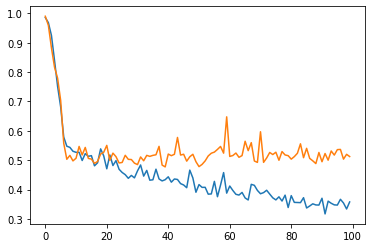

In [15]:
# Plotando a perda de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Callback

Importando as bibliotecas:

In [16]:
from tensorflow.keras.callbacks import Callback

Definindo os callbacks:

Treinamento:

In [17]:
class TrainingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Teste:

In [27]:
class TestingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Predição:

In [25]:
class PredictionCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Reconstruindo o modelo:

In [18]:
model = get_regularised_model(1e-5, 0.3)

Compilando o modelo:

In [19]:
model.compile(optimizer='adam', loss='mse')

Treinando o modelo e usando os callbacks:

In [23]:
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 2
Finished training


In [29]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

1.0964329242706299

In [30]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

array([[ 0.0413634 ],
       [ 0.05688161],
       [ 0.06232541],
       [ 0.05394328],
       [ 0.08743695],
       [-0.05518705],
       [-0.05141607],
       [ 0.0379139 ],
       [ 0.10515036],
       [ 0.05104319],
       [ 0.08014592],
       [ 0.00796125],
       [ 0.04505251],
       [ 0.00900286],
       [ 0.06342535],
       [-0.02537178],
       [-0.0165905 ],
       [-0.01185427],
       [ 0.11567222],
       [-0.04441807],
       [-0.00871539],
       [-0.05228184],
       [ 0.02336003],
       [ 0.09848506],
       [-0.01178795],
       [ 0.09790901],
       [ 0.0800355 ],
       [-0.03944593],
       [ 0.04194496],
       [-0.0524163 ],
       [ 0.06425392],
       [-0.05142479],
       [-0.0170042 ],
       [-0.0201246 ],
       [-0.0557815 ],
       [ 0.05342326],
       [ 0.10356913],
       [-0.05541667],
       [ 0.00259036],
       [-0.04516857],
       [ 0.01686842],
       [ 0.03604119],
       [ 0.05725417],
       [ 0.05876055],
       [-0.04575979]], dtype=flo